In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("C:/Users/DEEPANSH/Desktop/analytics project/Task 3/N2.csv")
df = df.drop(columns ='Unnamed: 0')

In [61]:
pd.set_option('display.max_columns', 50)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q12,Q13,Q16,Q18,Q20,Q21,Q24,Q25,Q26,Q28,Q30,Q31,Q32,Q34,Q35,age,gender,country
0,1,1,5,1,1,1,1,1,5,1,5,1,5,1,1,5,1,1,5,5,5,1,5,35,1,US
1,2,3,3,3,4,4,3,3,3,3,3,3,2,2,4,3,4,3,3,3,3,4,4,51,2,US
2,2,3,5,3,1,3,2,5,3,1,4,3,3,1,2,4,3,4,4,4,4,4,4,38,1,US
3,1,4,4,5,3,4,3,1,4,1,4,3,2,4,2,5,3,2,4,2,3,4,4,30,3,US
4,4,4,2,3,3,4,3,3,1,4,1,4,1,2,2,2,3,2,4,2,4,5,2,24,2,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,2,2,4,2,2,2,1,2,4,2,2,3,4,2,4,4,4,2,4,4,4,3,4,23,2,US
10002,2,3,2,1,2,2,2,2,1,2,2,2,2,2,2,4,2,2,4,4,2,3,4,28,1,US
10003,2,2,4,2,1,2,2,2,2,2,2,2,2,2,2,4,2,2,2,4,2,2,4,28,1,US
10004,2,3,4,4,2,4,3,2,1,1,2,4,4,1,3,3,3,1,2,5,2,2,4,25,2,US


In [62]:
# Hypothesis - 1 
# In a romantic partnership, young males (<30) are more anxious and insecure than young females.

In [63]:
df1 = df[(df['age'] < 30)]

In [64]:
# male dataset age <30
df1_m = df1[(df1['gender'] == 1)]
# female dataset age <30
df1_f = df1[(df1['gender'] == 2)]

In [65]:
# relevant Questions 4,6,28,32,34
df1_m = df1_m[['Q4', 'Q6','Q28','Q32', 'Q34', 'age', 'country']]
df1_f = df1_f[['Q4', 'Q6','Q28','Q32', 'Q34', 'age', 'country']]

In [66]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df1_m = df1_m.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df1_f = df1_f.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [67]:
# scoring denotes how stongly they feel anxiousness or insecure in a relationship
columns = ['Q4', 'Q6','Q28','Q32', 'Q34']
df1_m['resultant_score'] = df1_m[list(columns)].sum(axis=1)
df1_f['resultant_score'] = df1_f[list(columns)].sum(axis=1)

Text(0.5, 1.0, 'Female')

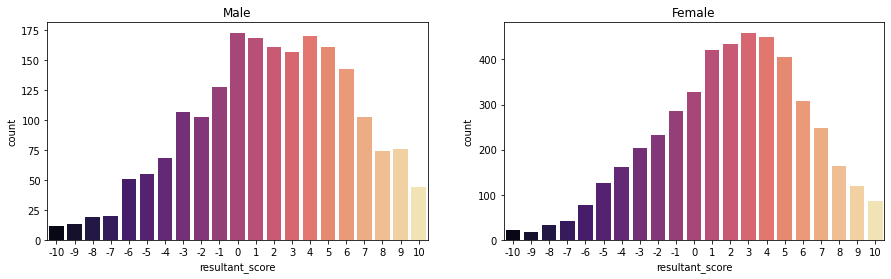

In [68]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(15,4))
sns.countplot(x = 'resultant_score', data = df1_m, palette = 'magma', ax = ax[0]).set_title('Male')
sns.countplot(x = 'resultant_score', data = df1_f, palette = 'magma',ax = ax[1]).set_title('Female')

In [69]:
# Considering the fact that there might be cases were the score is neutralised
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume the score should be atleast 2 

In [111]:
print('Mean score:', df1_m[(df1_m['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df1_m[(df1_m['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df1_m[(df1_m['resultant_score'] >2)]['resultant_score'].std())

Mean score: 5.658405172413793
Median score: 5.0
Std Dev score: 2.059711241597964


In [112]:
print('Mean score:', df1_f[(df1_f['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df1_f[(df1_f['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df1_f[(df1_f['resultant_score'] >2)]['resultant_score'].std())

Mean score: 5.370420017873101
Median score: 5.0
Std Dev score: 1.9829313906304844


In [123]:
# Result of Hypothesis suggests
# Mean score of male > females

# Thus hypothesis is True
# yes young male age < 30 in a  are more anxious and insecure than young females.

In [124]:
# Hypothesis - 2
# In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.

In [125]:
df2 = df

In [126]:
# male dataset 
df2_m = df2[(df2['gender'] == 1)]
# female dataset 
df2_f = df2[(df2['gender'] == 2)]

In [127]:
# relevant Questions 1,9,25,31,35
df2_m = df2_m[['Q1', 'Q9','Q25', 'Q31', 'Q35', 'age', 'country']]
df2_f = df2_f[['Q1', 'Q9','Q25', 'Q31', 'Q35', 'age', 'country']]

In [128]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df2_m = df2_m.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df2_f = df2_f.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [129]:
# Aligning the questions according to hypothesis by just changing the sign 
df2_m['Q1'] = -df2_m['Q1']
df2_f['Q1'] = -df2_f['Q1']
df2_m['Q9'] = -df2_m['Q9']
df2_f['Q9'] = -df2_f['Q9']

In [130]:
# scoring denotes how stongly they express themselves
columns = ['Q1', 'Q9','Q25', 'Q31', 'Q35']
df2_m['resultant_score'] = df2_m[list(columns)].sum(axis=1)
df2_f['resultant_score'] = df2_f[list(columns)].sum(axis=1)

Text(0.5, 1.0, 'Female')

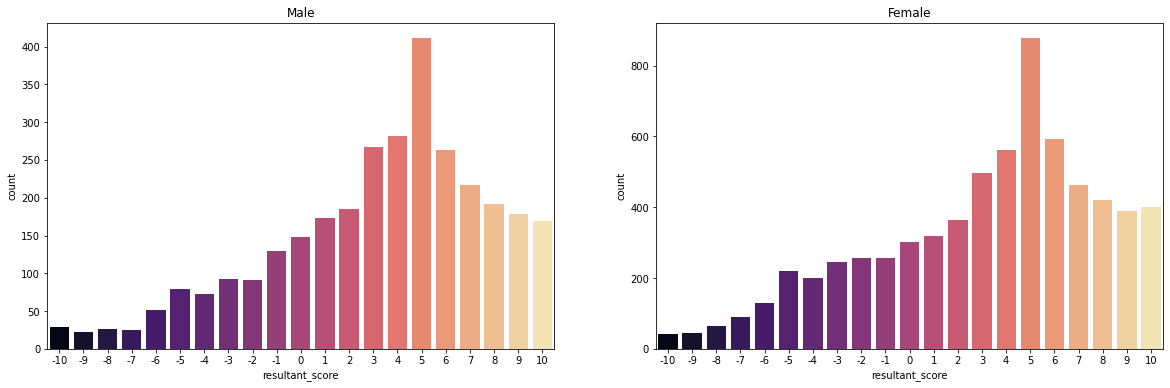

In [131]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x = 'resultant_score', data = df2_m, palette = 'magma', ax = ax[0]).set_title('Male')
sns.countplot(x = 'resultant_score', data = df2_f, palette = 'magma',ax = ax[1]).set_title('Female')

In [132]:
# Considering the fact that there might be cases were the score is neutralised
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume from the graph the score should be atleast 4

In [137]:
print('Mean score:', df2_m[(df2_m['resultant_score'] >4)]['resultant_score'].mean())
print('Median score:', df2_m[(df2_m['resultant_score'] >4)]['resultant_score'].median())
print('Std Dev score:', df2_m[(df2_m['resultant_score'] >4)]['resultant_score'].std())

Mean score: 6.979020979020979
Median score: 7.0
Std Dev score: 1.7409911330968244


In [138]:
print('Mean score:', df2_f[(df2_f['resultant_score'] >4)]['resultant_score'].mean())
print('Median score:', df2_f[(df2_f['resultant_score'] >4)]['resultant_score'].median())
print('Std Dev score:', df2_f[(df2_f['resultant_score'] >4)]['resultant_score'].std())

Mean score: 7.017488076311606
Median score: 7.0
Std Dev score: 1.7557646018436956


In [135]:
# Result of Hypothesis suggests
# Mean score of male < females

# Thus hypothesis can be considered nearly False or neutral 
# In a partnership (romantic or non romantic), males are 'NOT' more expressive (less hesitant) than females.

In [136]:
# Hypothesis - 3
# An American of age 30+ likes to be closer to romantic partners than an Indian of the same age does.

In [139]:
df3 = df
df3 = df3[(df3['age'] > 30)]

In [140]:
# US dataset 
df3_us = df3[(df3['country'] == 'US')]
# IN dataset 
df3_in = df3[(df3['country'] == 'IN')]

In [141]:
# relevant Questions 3,9,21,31
df3_us = df3_us[['Q3', 'Q9','Q21', 'Q31', 'age', 'gender']]
df3_in = df3_in[['Q3', 'Q9','Q21', 'Q31', 'age', 'gender']]

In [142]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df3_us = df3_us.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df3_in = df3_in.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [143]:
# Aligning the questions according to hypothesis by just changing the sign 
df3_us['Q9'] = -df3_us['Q9']
df3_in['Q9'] = -df3_in['Q9']
df3_us['Q21'] = -df3_us['Q21']
df3_in['Q21'] = -df3_in['Q21']

In [144]:
# scoring denotes how stongly they like to be closer to their romantic patner
columns = ['Q3', 'Q9','Q21', 'Q31']
df3_us['resultant_score'] = df3_us[list(columns)].sum(axis=1)
df3_in['resultant_score'] = df3_in[list(columns)].sum(axis=1)

Text(0.5, 1.0, 'India')

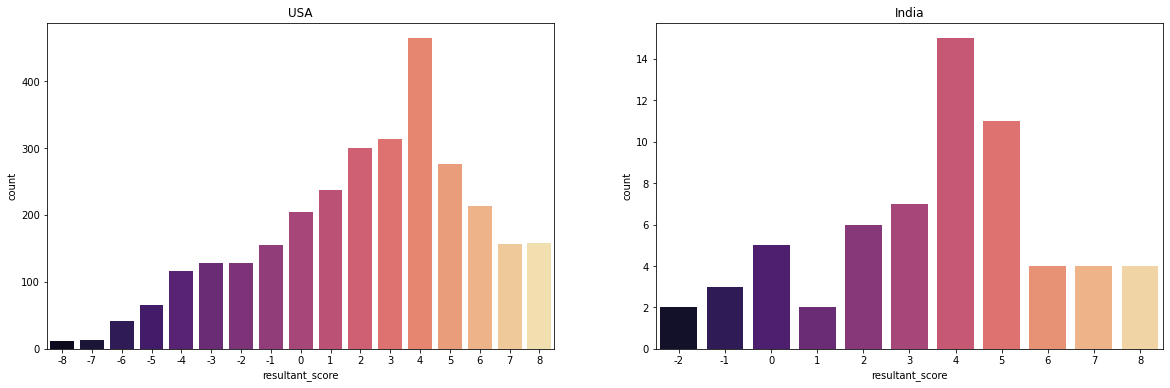

In [145]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x = 'resultant_score', data = df3_us, palette = 'magma', ax = ax[0]).set_title('USA')
sns.countplot(x = 'resultant_score', data = df3_in, palette = 'magma',ax = ax[1]).set_title('India')

In [153]:
# Considering the fact that there might be cases were the score is neutralised
# Dataset for people from India is comapratively less than those os US.
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume from the graph the score should be atleast 0

In [154]:
print('Mean score:', df3_us[(df3_us['resultant_score'] >0)]['resultant_score'].mean())
print('Median score:', df3_us[(df3_us['resultant_score'] >0)]['resultant_score'].median())
print('Std Dev score:', df3_us[(df3_us['resultant_score'] >0)]['resultant_score'].std())

Mean score: 4.084473808400189
Median score: 4.0
Std Dev score: 2.0262534665292


In [155]:
print('Mean score:', df3_in[(df3_in['resultant_score'] >0)]['resultant_score'].mean())
print('Median score:', df3_in[(df3_in['resultant_score'] >0)]['resultant_score'].median())
print('Std Dev score:', df3_in[(df3_in['resultant_score'] >0)]['resultant_score'].std())

Mean score: 4.415094339622642
Median score: 4.0
Std Dev score: 1.791367787089293


In [156]:
# Result of Hypothesis suggests
# Mean score of people from US < people from India

# Thus hypothesis is False
# An American of age 30+ likes to be closer to romantic partners 'BUT NOT MORE THAN' an Indian of the same age.

In [157]:
# Hypothesis - 4
# Indians have similar expressiveness towards romantic as well as non romantic partners.

In [158]:
df4 = df
# IN dataset 
df4 = df4[(df4['country'] == 'IN')]

In [159]:
# relevant Questions 3,9,21,31,32,34 for expressiveness towards romantic partners.
df4_rp = df4[['Q3', 'Q9','Q21', 'Q31', 'Q32', 'Q34']]
# relevant Questions 1,13,25,30,35 for expressiveness towards partners.
df4_p = df4[['Q1', 'Q13', 'Q25', 'Q30', 'Q35']]

In [160]:
# replacing 1,2 which is disagree with -2,-1 respectively
# replacing 4,5 which is agree with 1,2 respectively
# replacing 3 which is neither with 0
df4_rp = df4_rp.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])
df4_p = df4_p.replace([1, 2, 3, 4, 5], [-2,-1,0,1,2])

In [161]:
# Aligning the questions according to hypothesis by just changing the sign 
df4_rp['Q9'] = -df4_rp['Q9']
df4_rp['Q21'] = -df4_rp['Q21']
# Aligning the questions according to hypothesis by just changing the sign 
df4_p['Q1'] = -df4_p['Q1']

In [162]:
# scoring denotes how stongly they express
columns_rp = ['Q3', 'Q9','Q21', 'Q31', 'Q32', 'Q34']
columns_p = ['Q1', 'Q13', 'Q25', 'Q30', 'Q35']
df4_rp['resultant_score'] = df4_rp[list(columns_rp)].sum(axis=1)
df4_p['resultant_score'] = df4_p[list(columns_p)].sum(axis=1)

Text(0.5, 1.0, 'Patners')

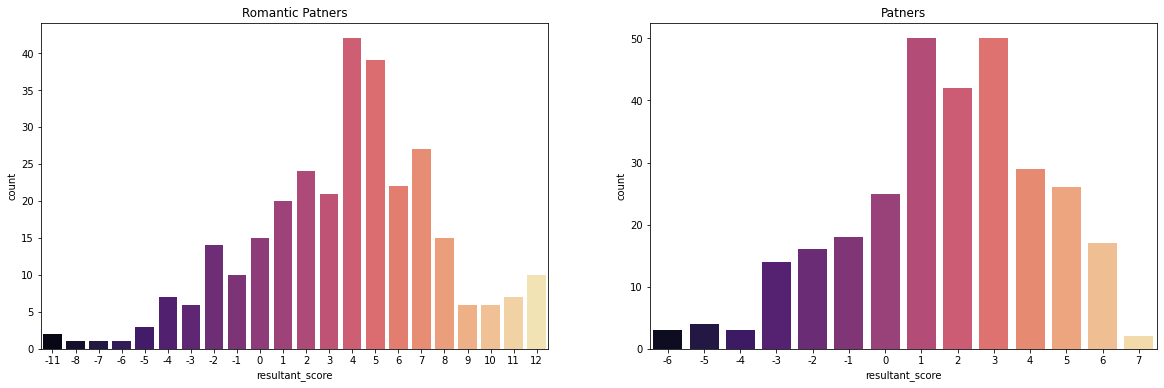

In [163]:
# create plot
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x = 'resultant_score', data = df4_rp, palette = 'magma', ax = ax[0]).set_title('Romantic Patners')
sns.countplot(x = 'resultant_score', data = df4_p, palette = 'magma',ax = ax[1]).set_title('Patners')

In [104]:
# Considering the fact that there might be cases were the score is neutralised
# Dataset for people from India is comapratively less than those os US.
# Thus considering only highy probable cases where they strongly agree with the hypothesis
# Lets assume from the graph the score should be atleast 2 

In [166]:
print('Mean score:', df4_rp[(df4_rp['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df4_rp[(df4_rp['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df4_rp[(df4_rp['resultant_score'] >2)]['resultant_score'].std())

Mean score: 6.041025641025641
Median score: 5.0
Std Dev score: 2.4533501131492956


In [167]:
print('Mean score:', df4_p[(df4_p['resultant_score'] >2)]['resultant_score'].mean())
print('Median score:', df4_p[(df4_p['resultant_score'] >2)]['resultant_score'].median())
print('Std Dev score:', df4_p[(df4_p['resultant_score'] >2)]['resultant_score'].std())

Mean score: 4.129032258064516
Median score: 4.0
Std Dev score: 1.140301927892712


In [168]:
# Result of Hypothesis suggests

# Thus hypothesis is False
# Indians have 'MORE' expressiveness towards romantic patners than non-romantic partners.

In [108]:
# Summary of hypothesis for N2 dataset

# a) In a romantic partnership, young males (<30) are more anxious and insecure than young females.----------------True
# b) In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.---nearly False
# c) An American of age 30+ likes to be closer to romantic partners than an Indian of the same age does.-----------False
# d) Indians have similar expressiveness towards romantic as well as non romantic partners.------------------------False
